# AST 7939 Homework Assignment #2 (10 pts)

## All work is due Wednesday February 22 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

## 1. Computational complexity (2 pts)

We learned that different machine learning algorithms have different computational costs. Let's check this out using the two moons dataset (see the cell below for an example). 

(a) While varying the number of data points in the training/test dataset from 100, 1000, 10000, to 100000, measure the time it takes for kNN, DT, and SVM to create a model (i.e., fit) and make predictions. For simplicity, instead of optimizing hyperparameters, use n_neighbors=10 for kNN, max_depth=4 for DT, and kernel="rbf", C=1, gamma=1 for SVM. (1 pt)

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import warnings
warnings.filterwarnings("ignore")

import time
import matplotlib.pyplot as plt

In [8]:
# kNN Model

time_knn = []
time_train_knn = []
num_knn = [100, 1000, 10000, 100000]

for n in num_knn:
    
    # Start the clock
    tstart = time.time()
    
    # This creates a training dataset.
    X_train, y_train = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)

    # This creates a test dataset for prediction. 
    X_pred, y_pred = datasets.make_moons(n_samples=n, noise=0.3, random_state=1)

    # Perform feature scaling
    X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
    X_pred_scaled = StandardScaler().fit(X_train).transform(X_pred)

    # Create kNN model
    k = 10 #number of neighbors
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    # Fit the training data to the model
    model.fit(X_train_scaled, y_train)
    
    time_train_knn.append(time.time()-tstart)

    model.predict(X_pred_scaled)

    time_knn.append(time.time()-tstart)
    
print('Training times: ',time_train_knn)
print('Predicting times: ',time_knn)



Training times:  [0.004403114318847656, 0.0028600692749023438, 0.010884761810302734, 0.06335115432739258]
Predicting times:  [0.008634328842163086, 0.02781534194946289, 0.14152979850769043, 1.3585011959075928]


In [7]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree


In [11]:
# Decision Tree Model

time_dt = []
time_train_dt = []
num_dt = [100, 1000, 10000, 100000]

for n in num_dt:
    
    # Start the clock
    tstart = time.time()

    # This creates a training dataset.
    X_train, y_train = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)

    # This creates a test dataset for prediction. 
    X_pred, y_pred = datasets.make_moons(n_samples=n, noise=0.3, random_state=1)

    # Create DT model
    max_depth = 4 
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    # Fit the training data to the model
    model.fit(X_train, y_train)
    
    time_train_dt.append(time.time()-tstart)

    model.predict(X_pred)

    time_dt.append(time.time()-tstart)

    print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")
    
print('Training times: ',time_train_dt)
print('Predicting times: ',time_dt)




Elapsed time: 0.003 seconds
Elapsed time: 0.005 seconds
Elapsed time: 0.018 seconds
Elapsed time: 0.118 seconds
Training times:  [0.003348112106323242, 0.004370212554931641, 0.017734766006469727, 0.1143190860748291]
Predicting times:  [0.0034902095794677734, 0.004606008529663086, 0.018461942672729492, 0.1177220344543457]


In [13]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

In [14]:
# Support Vector Machine Model

time_svm = []
time_train_svm = []
num_svm = [100, 1000, 10000, 100000]


for n in num_svm:
    
    # Start the clock
    tstart = time.time()

    # This creates a training dataset.
    X_train, y_train = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)

    # This creates a test dataset for prediction. 
    X_pred, y_pred = datasets.make_moons(n_samples=n, noise=0.3, random_state=1)

    # Perform feature scaling
    scaler = StandardScaler()

    # Create SVM model
    model = Pipeline([
        ('sc', scaler),
        ('svm', SVC(C=1, kernel="rbf", gamma=1, decision_function_shape='ovo', random_state=0))
    ])

    # Fit the training data to the model
    model.fit(X_train, y_train)
    
    time_train_svm.append(time.time()-tstart)

    model.predict(X_pred)

    time_svm.append(time.time()-tstart)

    print("Elapsed time: {:.3f}".format(time.time()-tstart) + " seconds")
    
print('Training times: ',time_train_svm)
print('Predicting times: ',time_svm)



Elapsed time: 0.011 seconds
Elapsed time: 0.058 seconds
Elapsed time: 2.709 seconds
Elapsed time: 298.942 seconds
Training times:  [0.00980687141418457, 0.034594058990478516, 1.2925827503204346, 158.47939014434814]
Predicting times:  [0.011162042617797852, 0.05796623229980469, 2.7090086936950684, 298.9420940876007]


(b) Make a plot showing the running time vs. size of dataset for the three algorightms and for training/prediction -- you will have six curves in the end. Make sure your figure is readable. Discuss what you find from the plot. Using a logarithmic scale for both x and y axes will be helpful to interpret the result. (1 pt)

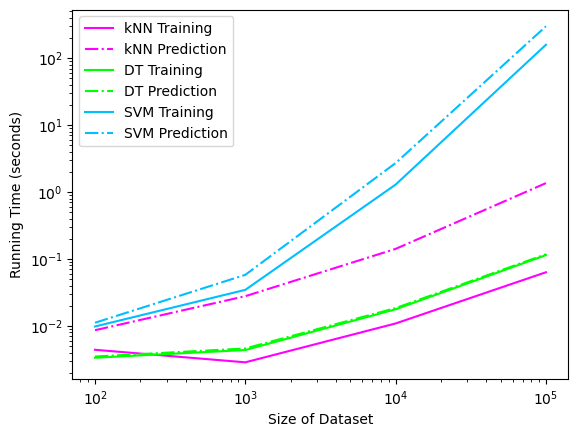

In [19]:
# Plotting
plt.plot(num_knn, time_train_knn, label='kNN Training', color='fuchsia')
plt.plot(num_knn, time_knn, label='kNN Prediction', color='fuchsia', linestyle='-.')
plt.plot(num_dt, time_train_dt, label = 'DT Training', color='lime')
plt.plot(num_dt, time_dt, label = 'DT Prediction', color='lime', linestyle='-.')
plt.plot(num_svm, time_train_svm, label = 'SVM Training', color='deepskyblue')
plt.plot(num_svm, time_svm, label = 'SVM Prediction', color='deepskyblue', linestyle='-.')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size of Dataset')
plt.ylabel('Running Time (seconds)')
plt.legend();


## 2. Support Vector Machine classifier (8 pts)

We will build Support Vector Machines to determine the hyperplane separating Super-Earths and Sub-Neptunes, the so-called radius valley in planet radius vs. orbital period plots (see Fulton et al. 2017; https://ui.adsabs.harvard.edu/abs/2017AJ....154..109F/abstract). To determine accurate planet parameters from transit surveys, accurate stellar parameters are required, because the transit depth only constrains $R_p/R_*$, where $R_p$ and $R_*$ are the planetary and stellar radius. In Van Eylen et al. (2018; https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.4786V/abstract), authors used a sample of exoplanet host stars with parameters homogeneously measured from asteroseismology, which can provide highly precise masses and radii for a sample of bright stars, and determined that the radius valley can be describe by ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$, where $m=-0.09^{+0.02}_{-0.04}$ and $a=0.37^{+0.04}_{-0.02}$.

In this homework problem, we will reproduce the SVM models of Van Eylen et al. (2018).

(a) First things first: let's collect the data presented in Table 1 of Van Eylen et al. (2018). One way to do this is to download the source file from the arXiv and read in the table (and do some cleaning). This can be tedious, but remember that making a ML model will always start with data acquisition and cleaning! When you submit your homework, upload the data file you compile so that I can reproduce your results. (1 pt)

In [2]:
from astropy.table import Table
import numpy as np

# Read in the table from the text file with some help from astropy
t = Table.read('homework2_input.tex')


In [3]:
# Look at the table
display(t)

# Store each column in a array
name_tab = t['Planet'] 
radius_planet_tab = t['R$_\mathrm{p}$ [R$_\oplus$]']
period_tab = t['Period [d]']
mass_star_tab = t['M$_\star$ [M$_\odot$]']
radius_star_tab = t['R$_\star$ [R$_\odot$]']

Planet,R$_\mathrm{p}$ [R$_\oplus$],Period [d],M$_\star$ [M$_\odot$],R$_\star$ [R$_\odot$]
str11,str17,str18,str25,str28
Kepler-10b,$1.473 \pm 0.026$,$0.83749026 (29)$,$0.920_{-0.020}^{+0.010}$,$1.0662_{-0.0075}^{+0.0069}$
Kepler-10c,$2.323 \pm 0.028$,$45.294292 (97)$,$0.920_{-0.020}^{+0.010}$,$1.0662_{-0.0075}^{+0.0069}$
Kepler-23b,$1.694 \pm 0.076$,$7.106995 (73)$,$1.078_{-0.077}^{+0.077}$,$1.548_{-0.048}^{+0.048}$
Kepler-23c,$3.12 \pm 0.10$,$10.742434 (39)$,$1.078_{-0.077}^{+0.077}$,$1.548_{-0.048}^{+0.048}$
Kepler-23d,$2.235 \pm 0.088$,$15.27429 (17)$,$1.078_{-0.077}^{+0.077}$,$1.548_{-0.048}^{+0.048}$
Kepler-25b,$2.702 \pm 0.037$,$6.2385369 (33)$,$1.160_{-0.050}^{+0.040}$,$1.299_{-0.016}^{+0.015}$
...,...,...,...,...
Kepler-410,$2.786 \pm 0.045$,$17.833613 (47) $,$1.22^{+0.07}_{-0.07}$,$1.35^{+0.02}_{-0.02}$
Kepler-93,$1.477 \pm 0.033$,$ 4.72673930 (86)$,$0.89^{+0.07}_{-0.07}$,$0.91^{+0.02}_{-0.02}$


In [4]:
# Cleaning the data (figure things out with just one row)
r = radius_planet_tab[66].split()
radius_p = float(r[0].strip('$'))

p = period_tab[66].split()
if p[0] == '$':
    period = float(p[1])
else:
    period = float(p[0].strip('$'))
period

4.8878024

In [5]:
len(radius_planet_tab)

75

In [6]:
# Cleaning the data (whole table)
radius_p = []
period = []

i=0
while i < len(radius_planet_tab):
    r = radius_planet_tab[i].split()
    radius_p.append(float(r[0].strip('$')))

    p = period_tab[i].split()
    if p[0] == '$':
        period.append(float(p[1]))
    else:
        period.append(float(p[0].strip('$')))
    
    #print(i)
    
    i = i+1
    
radius_p = np.array(radius_p)
period = np.array(period);


In [7]:
len(radius_p), len(period)

(75, 75)

(b) Let's make a plot showing planet radius vs. orbital period, similar to Figure 2 of Van Eylen et al. (2018) but without additional data from Fulton et al. (2017). Similar to Figure 2 of Van Eylen et al. (2018), make two panels, one showing the entire data points and the other showing 1-100 days & 1-4 Earth radii to more clearly identify the radius valley. (1 pt)

In [8]:
period.shape, radius_p.shape

((75,), (75,))

In [9]:
np.max(radius_p), np.max(period)

(17.68, 289.8655)

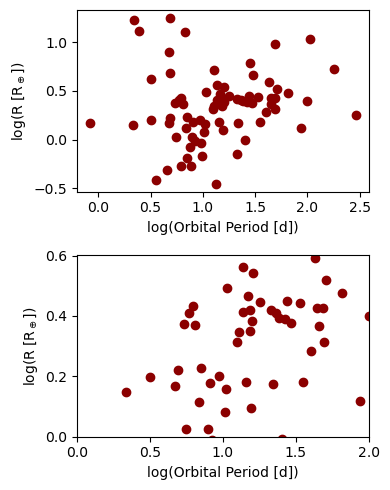

In [10]:
# plotting log(value)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(4,5))

ax1.scatter(np.log10(period), np.log10(radius_p), color='darkred')
ax1.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')


ax2.scatter(np.log10(period), np.log10(radius_p), color='darkred')
ax2.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')
plt.xlim(np.log10(1),np.log10(100))
plt.ylim(np.log10(1),np.log10(4))

plt.tight_layout();


(c) We would like to fit the radius valley using the SVM. However, in order to use the SVM, we need a labelled data in the first place. Luckily, we have a well separated dataset. In Van Eylen et al. (2018), they took a few different approaches to fit the radius valley. Here, let's use one of the fits from bootstrapping, that is, if a planet's radius and orbital periods satisfy ${\rm log}_{10} R_p > m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$, then we will label them as sub-Neptunes. If ${\rm log}_{10} R_p \leq m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$, we will label them as super-Earth. Using this criterion, make an array that contains the label (e.g., 0 if sub-Neptune, 1 if super-Earth).

Then, repeat #2b and make similar plots, but this time make the data points color-coded by their labels. Also, add a line showing ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$. Your plot should look similar to Figure 5 of Van Eylen et al. (2018), except that you will have a single line dividing super-Earths and sub-Neptunes instead of multiple lines representing 20 different fits. (1 pt)

In [11]:
# Convert to log instead of cartesian
log_radius_p = np.log10(radius_p)
log_period = np.log10(period)
labels = []

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a


i = 0
while i < len(boundary):
    
    if log_radius_p[i] > boundary[i]:
        labels.append(0) #0 -> sub-Neptunes
    if log_radius_p[i] < boundary[i]:
        labels.append(1) #1 -> super-Earths
        
    i = i+1
    

labels;


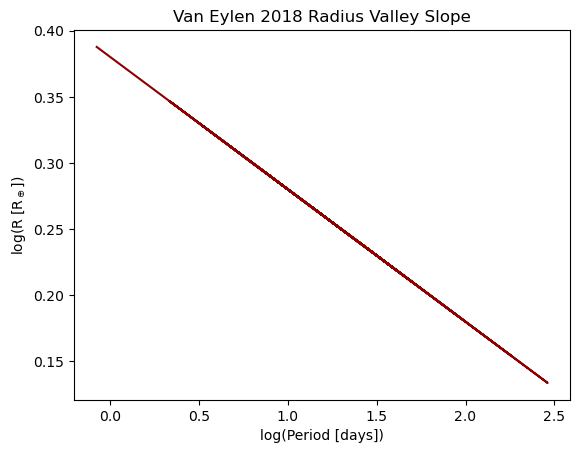

In [12]:
plt.plot(log_period, boundary, color='darkred')
plt.title('Van Eylen 2018 Radius Valley Slope')
plt.xlabel('log(Period [days])')
plt.ylabel('log(R [R$_\oplus$])');

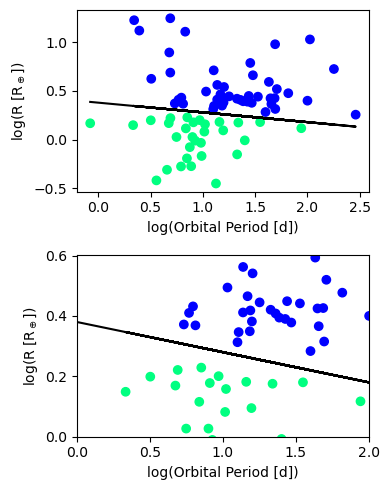

In [13]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(4,5))

# as determined by Van Eylen et al (2018):
m = -0.10
a = 0.38
boundary = (m * log_period) + a

ax1.scatter(np.log10(period), np.log10(radius_p), c=labels, cmap='winter')
ax1.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')
ax1.plot(np.log10(period), boundary, color='black')

# Zoom-in
ax2.scatter(np.log10(period), np.log10(radius_p), c=labels, cmap='winter')
ax2.set(xlabel='log(Orbital Period [d])', ylabel='log(R [R$_\oplus$])')
ax2.plot(np.log10(period), boundary, color='black')
plt.xlim(np.log10(1),np.log10(100))
plt.ylim(np.log10(1),np.log10(4))


plt.tight_layout();

(d) Now that we have a labelled dataset, we are ready to build SVM models. Using orbital period and planet radius (both in log scale) as two features, make a few linear SVM models varying the panelty parameter C from 0.01, 0.1, 1, 10, 100, to 1000. Then, make six figures showing the data, hyperplane, and support vectors. Don't forget that SVMs need feature scaling. (2 pt)

In [14]:
# Function from Jaehan:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=120, edgecolors='black', facecolors='none', alpha=0.5)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [15]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

# Get data in a more useable format
X = np.array([log_period, log_radius_p]).T
y = np.array(labels)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Feature scaling
scaler = StandardScaler()

# Make 6 linear SVM models with different values of C
svm_clf1 = LinearSVC(C=0.01, random_state=0)
svm_clf2 = LinearSVC(C=0.1, random_state=0)
svm_clf3 = LinearSVC(C=1.0, random_state=0)
svm_clf4 = LinearSVC(C=10.0, random_state=0)
svm_clf5 = LinearSVC(C=100.0, random_state=0)
svm_clf6 = LinearSVC(C=1000.0, random_state=0)

# Making pipelines.
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])
scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])
scaled_svm_clf4 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf4),
    ])
scaled_svm_clf5 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf5),
    ])
scaled_svm_clf6 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf6),
    ])

# Fit the model to the training data
scaled_svm_clf1.fit(X_train, y_train) 
scaled_svm_clf2.fit(X_train, y_train) 
scaled_svm_clf3.fit(X_train, y_train) 
scaled_svm_clf4.fit(X_train, y_train) 
scaled_svm_clf5.fit(X_train, y_train) 
scaled_svm_clf6.fit(X_train, y_train) 



Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1000.0, random_state=0))])

In [16]:
X.shape, y.shape

((75, 2), (75,))

In [15]:
scaled_svm_clf5.score(X_test, y_test)

1.0

In [16]:
# This cell is to visualize the support vectors and margins.

# Convert to unscaled parameters (want to visualize in the unscaled dataset)
# Eqn 2 in notes from 2/8
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])
b4 = svm_clf4.decision_function([-scaler.mean_ / scaler.scale_])
b5 = svm_clf5.decision_function([-scaler.mean_ / scaler.scale_])
b6 = svm_clf6.decision_function([-scaler.mean_ / scaler.scale_])

# Eqn 1 in notes from 2/8
w1 = svm_clf1.coef_[0] / scaler.scale_ #scale_ = sigma
w2 = svm_clf2.coef_[0] / scaler.scale_ #scale_ = sigma
w3 = svm_clf3.coef_[0] / scaler.scale_ #scale_ = sigma
w4 = svm_clf4.coef_[0] / scaler.scale_ #scale_ = sigma
w5 = svm_clf5.coef_[0] / scaler.scale_ #scale_ = sigma
w6 = svm_clf6.coef_[0] / scaler.scale_ #scale_ = sigma


svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])
svm_clf4.intercept_ = np.array([b4])
svm_clf5.intercept_ = np.array([b5])
svm_clf6.intercept_ = np.array([b6])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])
svm_clf4.coef_ = np.array([w4])
svm_clf5.coef_ = np.array([w5])
svm_clf6.coef_ = np.array([w6])

# Find support vectors (LinearSVC does not do this automatically). 
# Eqn 3 in notes from 2/8
t = y * 2 - 1 # Make labels -1 and 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()
support_vectors_idx4 = (t * (X.dot(w4) + b4) < 1).ravel()
support_vectors_idx5 = (t * (X.dot(w5) + b5) < 1).ravel()
support_vectors_idx6 = (t * (X.dot(w6) + b6) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]
svm_clf3.support_vectors_ = X[support_vectors_idx3]
svm_clf4.support_vectors_ = X[support_vectors_idx4]
svm_clf5.support_vectors_ = X[support_vectors_idx5]
svm_clf6.support_vectors_ = X[support_vectors_idx6]




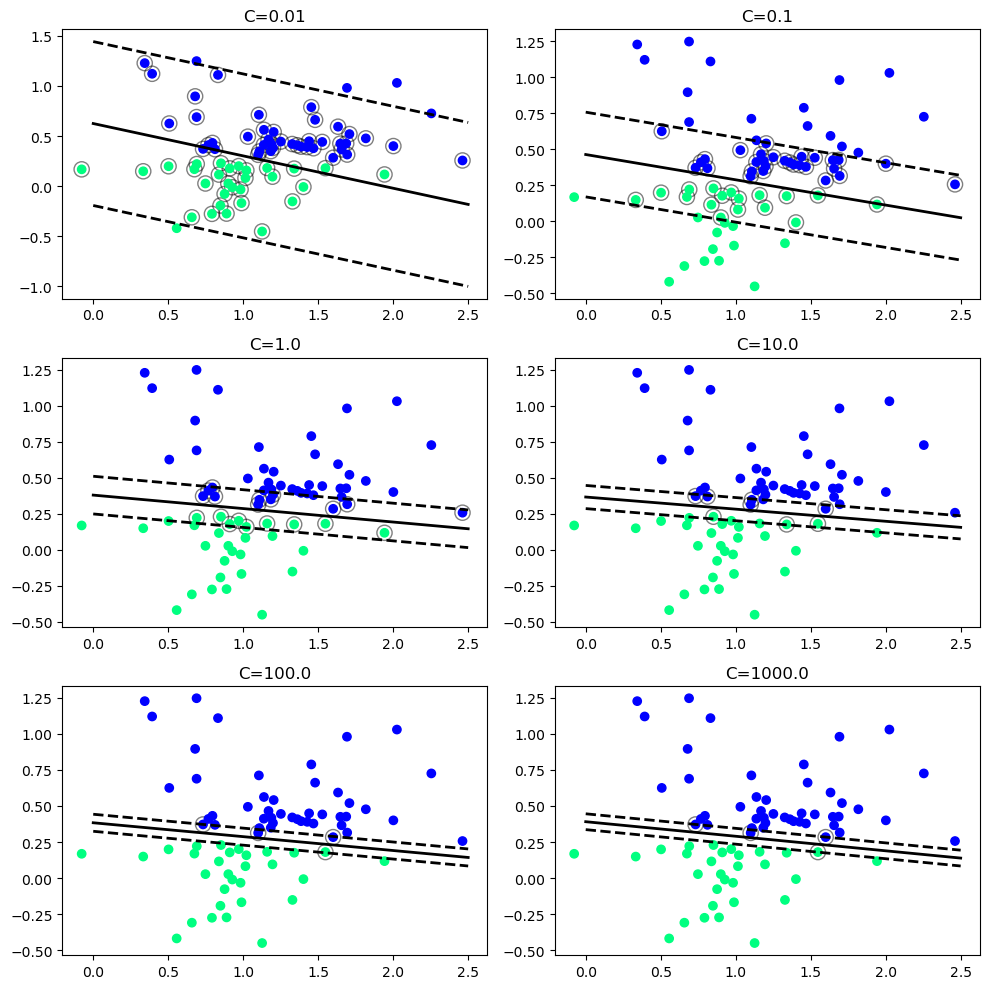

In [528]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plot_svc_decision_boundary(svm_clf1, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=0.01')

plt.subplot(3,2,2)
plot_svc_decision_boundary(svm_clf2, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=0.1')

plt.subplot(3,2,3)
plot_svc_decision_boundary(svm_clf3, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=1.0')

plt.subplot(3,2,4)
plot_svc_decision_boundary(svm_clf4, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=10.0')

plt.subplot(3,2,5)
plot_svc_decision_boundary(svm_clf5, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=100.0')

plt.subplot(3,2,6)
plot_svc_decision_boundary(svm_clf6, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=1000.0')

plt.tight_layout();

(e) Which penalty parameter $C$ do you think best seperates super-Earths and sub-Neptunes? And why? Write down an equation for the hyperplane in the form of ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$. (1 pt)

**All values of C do a good job of seperating super-Earths and sub-Neptunes. I think C=10.0 seperates them the best because the margins between the support vectors and hyperplane are small without being too small.**











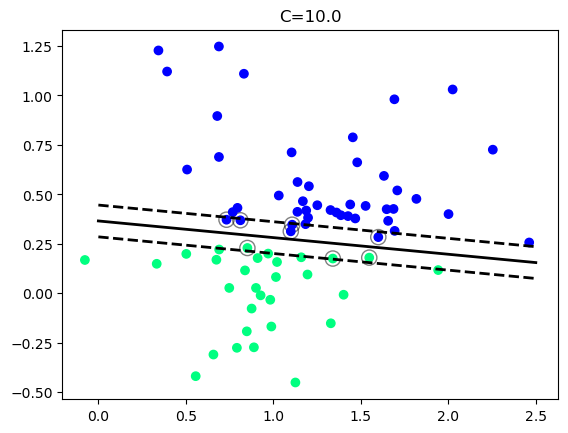

In [18]:
plot_svc_decision_boundary(svm_clf4, 0.0, 2.5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='winter')
plt.title('C=10.0')

plt.savefig('svm_radiusvalley.png')

In [565]:
# Find the slope and intercept of the C=10.0 hyperplane 
w = svm_clf4.coef_[0]
slope = -w[0]/w[1]
intercept = -b4/w[1]

slope, intercept

(-0.08417664549468029, array([0.36551929]))

**Hyperplane equation for C=10.0:**

$$
\log_{10}(R_P) = -0.08\log_{10}(P)+0.37
$$

(f) Uncertainties on the slope $m$ and offset $a$ can be determined using bootstrapped samples ([random sampling with replacement](https://en.wikipedia.org/wiki/Bootstrapping_(statistics) )). Following Van Eylen et al. (2018), generate 1000 bootstrapped samples each of which has the same size as the original dataset. For each bootstrapped, compute the slope $m$ and offset $a$ of the hyperplane using the best $C$ you determined from #2e. Compute the mean and standard deviation of $m$ and $a$. What is your final hyperplane, and how does that compare with the hyperplane Van Eylen et al. (2018) determined? (2 pt)  

In [592]:
X = np.array([log_period, log_radius_p]).T
y = np.array(labels)
slope = []
offset = []

npanel = 1000 #want 1000 bootstrapped samples

for i in np.arange(npanel):
    # This is where bootstrap is happening.
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]
    
    scaler = StandardScaler()
    # Create the model
    svm = LinearSVC(C=10.0, random_state=0) 
    # Pipeline
    scaled_svm = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm),
    ])
    # Fit the model
    scaled_svm.fit(X_new, y_new)
    
    # Compute the slope and offset
    w = svm.coef_[0]
    b = svm.decision_function([-scaler.mean_ / scaler.scale_])
    m = -w[0]/w[1] #slope
    B = float(-b/w[1]) #offset

    slope.append(m)
    offset.append(B)





/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/lorrainen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [595]:
import statistics

mean_slope = statistics.mean(slope)
mean_offset = statistics.mean(offset)

std_slope = statistics.stdev(slope, mean_slope)
std_offset = statistics.stdev(offset, mean_offset)

In [596]:
print('Slope mean = ',mean_slope)
print('Slope standard deviation = ', std_slope)

print('Offset mean = ',mean_offset)
print('Offset standard deviation = ', std_offset)

Slope mean =  -0.1025370591472466
Slope standard deviation =  0.029477822529510568
Offset mean =  1.0039730392092545
Offset standard deviation =  0.11145445866234233


**Using the mean slope and offset produced by the bootstrapping method, the equation of my final hyperplane is:**

$$
\log_{10}(R_P) = -0.103\log_{10}(P)+1.003
$$

### Congratulations! With this homework, you essentially reproduced results presented in a journal paper. If you enjoyed the homework and would like to do some additional related analysis, I recommend you have a look at the following papers. Reproducing (and extending) the following papers would be a nice term project.

https://ui.adsabs.harvard.edu/abs/2021AJ....161..265D/abstract

https://ui.adsabs.harvard.edu/abs/2023MNRAS.519.4056H/abstract